In [1]:
import tensorflow as tf
from tensorflow.contrib.slim import nets
slim = tf.contrib.slim

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Build Resnet50 v1 network
inputs = tf.placeholder(tf.float32, [None, 224, 224, 3], name="inputs")
with slim.arg_scope(nets.resnet_v1.resnet_arg_scope()):
    net, endpoints = nets.resnet_v1.resnet_v1_50(inputs, num_classes=None, is_training=False)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
## Start Session and load pretrained Model
sess = tf.InteractiveSession()
pretrain_model = './resnet_v1_50.ckpt'
variable_to_restore = slim.get_variables_to_restore()
init_fn = slim.assign_from_checkpoint_fn(pretrain_model, variable_to_restore, ignore_missing_vars=True)
init_fn(sess)

INFO:tensorflow:Restoring parameters from ./resnet_v1_50.ckpt


In [4]:
endpoints

OrderedDict([('resnet_v1_50/conv1',
              <tf.Tensor 'resnet_v1_50/conv1/Relu:0' shape=(?, 112, 112, 64) dtype=float32>),
             ('resnet_v1_50/block1/unit_1/bottleneck_v1/shortcut',
              <tf.Tensor 'resnet_v1_50/block1/unit_1/bottleneck_v1/shortcut/BatchNorm/FusedBatchNorm:0' shape=(?, 56, 56, 256) dtype=float32>),
             ('resnet_v1_50/block1/unit_1/bottleneck_v1/conv1',
              <tf.Tensor 'resnet_v1_50/block1/unit_1/bottleneck_v1/conv1/Relu:0' shape=(?, 56, 56, 64) dtype=float32>),
             ('resnet_v1_50/block1/unit_1/bottleneck_v1/conv2',
              <tf.Tensor 'resnet_v1_50/block1/unit_1/bottleneck_v1/conv2/Relu:0' shape=(?, 56, 56, 64) dtype=float32>),
             ('resnet_v1_50/block1/unit_1/bottleneck_v1/conv3',
              <tf.Tensor 'resnet_v1_50/block1/unit_1/bottleneck_v1/conv3/BatchNorm/FusedBatchNorm:0' shape=(?, 56, 56, 256) dtype=float32>),
             ('resnet_v1_50/block1/unit_1/bottleneck_v1',
              <tf.Tensor 're

In [5]:
layer_activation_conv = endpoints["resnet_v1_50/conv1"]
layer_activation_block1 = endpoints["resnet_v1_50/block1"]
layer_activation_block4 = endpoints["resnet_v1_50/block4"]

In [6]:
## Feed a image and get layer activation 
img = np.array(Image.open('1.png').resize([224,224]))
Image.fromarray(img)
img = np.resize(img, [1,224,224,3])
output_conv, output_block1, output_block4 = sess.run([layer_activation_conv,layer_activation_block1,layer_activation_block4], feed_dict={inputs:img})

In [7]:
print("first conv shape: ",output_conv.shape)
print("block1 conv shape: ",output_block1.shape)
print("block4 conv shape: ",output_block1.shape)

first conv shape:  (1, 112, 112, 64)
block1 conv shape:  (1, 28, 28, 256)
block4 conv shape:  (1, 28, 28, 256)


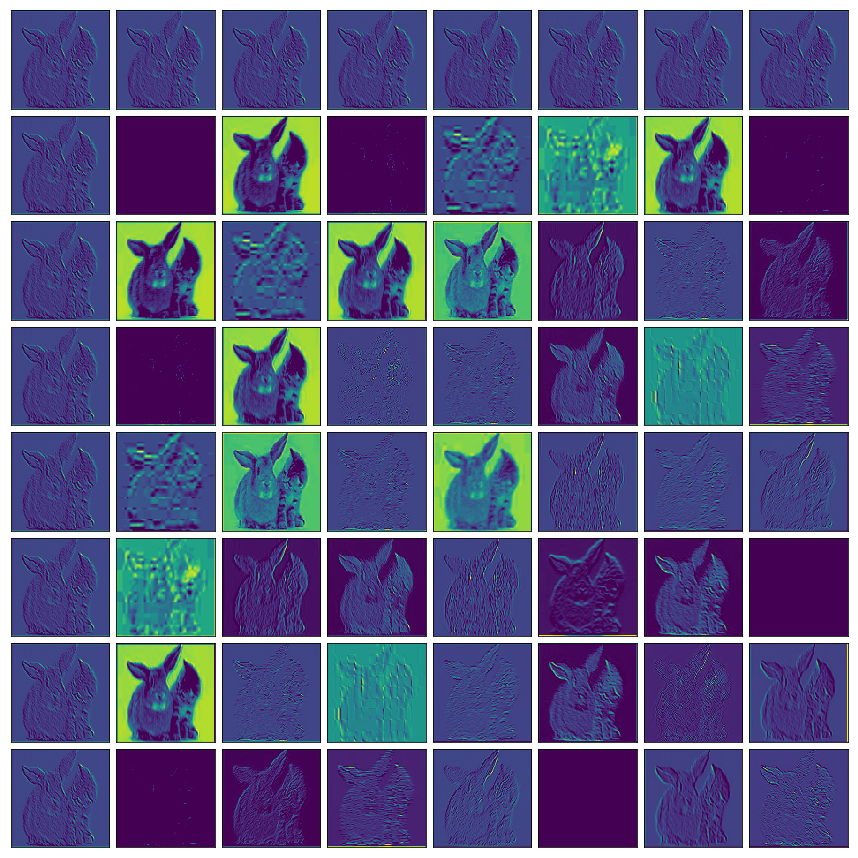

In [8]:
rows = 8
cols = 8
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        ax[i][j].imshow(output_conv[0,:,:,i*j],cmap="viridis")
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].axis('image')
plt.tight_layout(pad=1, h_pad=0, w_pad=0)
plt.show()

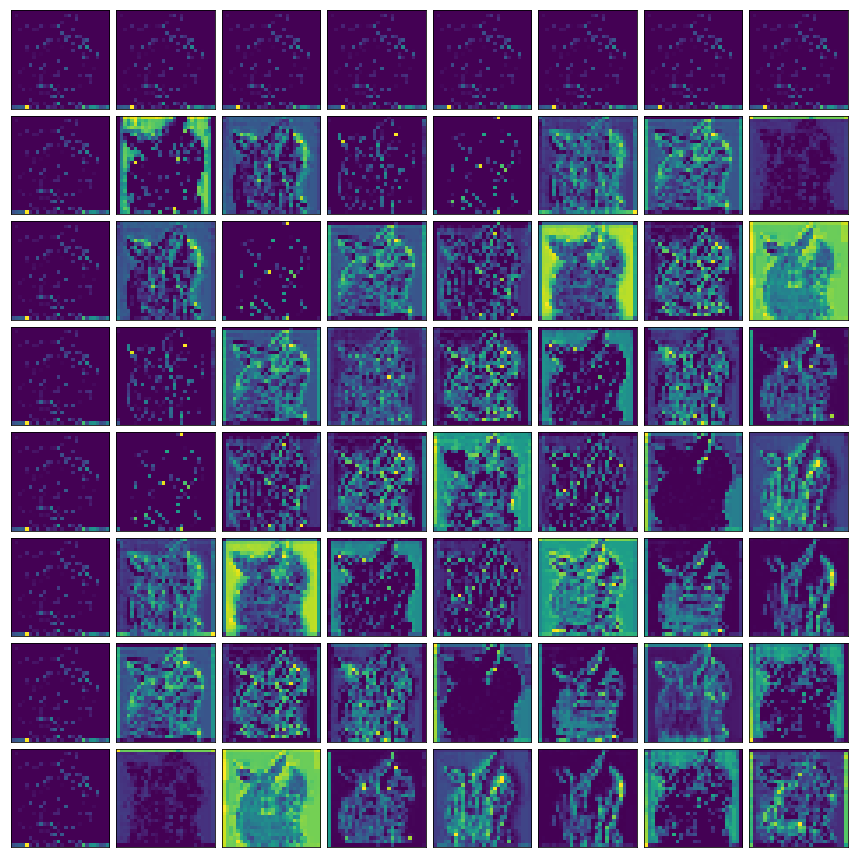

In [12]:
rows = 8
cols = 8
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        ax[i][j].imshow(output_block1[0,:,:,i*j],cmap="viridis")
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].axis('image')
plt.tight_layout(pad=1, h_pad=0, w_pad=0)
plt.show()
# fig.savefig('./result_1.png', dpi=200)

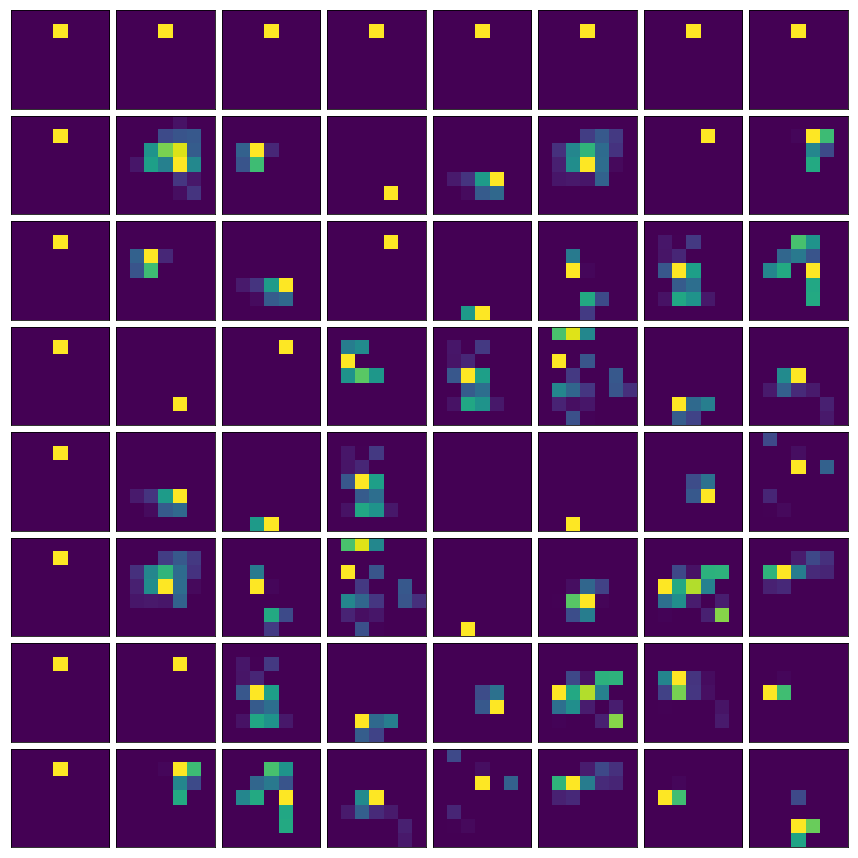

In [10]:
rows = 8
cols = 8
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12))
for i in range(rows):
    for j in range(cols):
        ax[i][j].imshow(output_block4[0,:,:,i*j],camp="viridis")
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        ax[i][j].axis('image')
plt.tight_layout(pad=1, h_pad=0, w_pad=0)
plt.show()